In [2]:
pip install yfinance as yf

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ta-lib

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.3/372.3 kB 7.3 MB/s eta 0:00:000:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for ta-lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      <string>:83: UserWarning: Cannot find ta-lib library, installation may fail.
      /tmp/pip-build-env-irb4cyat/overlay/lib/python3.11/site-packages/setuptools/config/_apply_pyprojecttoml.py:81: SetuptoolsWarning: `install_requires` overwritten in `pyproject.toml` (dependencies)
        corresp(dist, value, root_dir)
      running bdist_wheel
      running build
      running build_py
      creating build/lib.linux-x86_64-cpython-311/talib
      cop

In [4]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# List of tickers for MBS, index funds, gold, and derivatives
tickers = ['MBB', 'SPY', 'GLD', 'VXX']
data = yf.download(tickers, start = '2020-01-01', end = '2025-01-01')['Close']
data

[*********************100%***********************]  4 of 4 completed


Ticker,GLD,MBB,SPY,VXX
Date,,,,
2020-01-02,143.949997,95.284843,301.194946,928.640015
2020-01-03,145.860001,95.364098,298.914246,978.559998
2020-01-06,147.389999,95.372932,300.054474,965.119995
2020-01-07,147.970001,95.390518,299.210876,960.640015
2020-01-08,146.860001,95.346497,300.805450,947.200012
...,...,...,...,...
2024-12-24,241.440002,91.300003,601.299988,42.279999
2024-12-26,243.070007,91.480003,601.340027,42.549999
2024-12-27,241.399994,91.440002,595.010010,44.430000


In [6]:
returns = data.pct_change().dropna()
returns.head(5)

Ticker,GLD,MBB,SPY,VXX
Date,,,,
2020-01-03,0.013269,0.000832,-0.007572,0.053756
2020-01-06,0.010490,0.000093,0.003815,-0.013734
2020-01-07,0.003935,0.000184,-0.002811,-0.004642
2020-01-08,-0.007502,-0.000461,0.005329,-0.013991
2020-01-09,-0.005652,0.000092,0.006781,-0.041892


In [7]:
mean_returns = returns.mean()
cov_matrix = returns.cov()

In [8]:
def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate= 0.035):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio= (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

In [9]:
def weight_sum_constraints(weights):
    return np.sum(weights) - 1
    

In [10]:
bounds = [(0,1) for _ in range(len(tickers))]

In [11]:
initial_weights = np.array([0.05, 0.3, 0.5, 0.15])

In [12]:
from scipy.optimize import minimize

In [64]:
# Define number of assets
num_assets = len(mean_returns)

# Initial equal weights
initial_weights = np.ones(num_assets) / num_assets  

# Bounds: Each weight must be between 0% and 50%
bounds = [(0, 0.50) for _ in range(num_assets)]  

# Constraint: Sum of weights must be 1
weight_sum_constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}

In [68]:
# Optimization with the new constraint
result0 = minimize(
    sharpe_ratio, 
    initial_weights, 
    args=(mean_returns, cov_matrix), 
    method='trust-constr',  
    bounds=bounds,  
    constraints=weight_sum_constraints  
)

# Print new optimized weights
print("Optimized Weights:", result0.x)
print("Optimized Sharpe Ratio:", result0.fun)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Optimized Weights: [0.02042746 0.4745782  0.39984927 0.10514507]
Optimized Sharpe Ratio: -0.1263018377918958


In [15]:
def sharpe_ratio1(weights, mean_returns, cov_matrix, risk_free_rate= 0.04):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio= (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

In [70]:
# Optimization with the new constraint
result1 = minimize(
    sharpe_ratio1, 
    initial_weights, 
    args=(mean_returns, cov_matrix), 
    method='trust-constr',  
    bounds=bounds,  
    constraints=weight_sum_constraints  
)

# Print new optimized weights
print("Optimized Weights:", result1.x)
print("Optimized Sharpe Ratio:", result1.fun)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Optimized Weights: [0.13788926 0.36652142 0.26451742 0.2310719 ]
Optimized Sharpe Ratio: 0.01098178444214108


In [18]:
def sharpe_ratio2(weights, mean_returns, cov_matrix, risk_free_rate= 0.048):
    portfolio_return = np.dot(weights, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio= (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

In [72]:
# Optimization with the new constraint
result2 = minimize(
    sharpe_ratio2, 
    initial_weights, 
    args=(mean_returns, cov_matrix), 
    method='trust-constr',  
    bounds=bounds,  
    constraints=weight_sum_constraints  
)

# Print new optimized weights
print("Optimized Weights:", result2.x)
print("Optimized Sharpe Ratio:", result2.fun)

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Optimized Weights: [0.18079704 0.3290658  0.242477   0.24766017]
Optimized Sharpe Ratio: 0.14865741251867048


In [74]:
# Print optimized weights for each security
for security, weight in zip(returns, result2.x):
    print(f"{returns}: {weight:.4f}")

# Print the optimized Sharpe ratio
print(f"Optimized Sharpe Ratio: {result2.fun:.4f}")

[[ 0.11291628  0.1371541  -0.00758563  0.1263649 ]
 [-0.0339296  -0.10947305 -0.06072101 -0.03542117]
 [ 0.02581969  0.14298259  0.02618705  0.06280618]
 [-0.01234894  0.15365489  0.10363513  0.05403643]
 [ 0.03110943 -0.02520767  0.0423834   0.11016483]
 [-0.10560359  0.04686348  0.00445114  0.10790135]
 [-0.00668162 -0.01188233 -0.00600167 -0.02321634]
 [ 0.04503284  0.19544625  0.12133274  0.15718159]
 [-0.05239286 -0.03117431  0.04355866  0.09926229]
 [ 0.09123365  0.09867069  0.13180398  0.03514795]
 [ 0.04478492  0.12100254  0.12100652  0.09061316]
 [ 0.05017682  0.09630787 -0.02413045  0.10538706]
 [ 0.00688199  0.0302337   0.02454192 -0.11263541]
 [-0.05408072  0.02813509  0.09737913  0.00404208]
 [ 0.01159555  0.18834566 -0.05187597 -0.05224411]
 [ 0.05952294 -0.01124716 -0.02388013  0.08381604]
 [ 0.10032699  0.00931557  0.08582988  0.04322365]
 [ 0.06470153  0.08045666  0.12338703  0.11061932]
 [ 0.05580613  0.1183429   0.09109047  0.02883248]
 [ 0.08069496  0.08118384  0.00

In [21]:
import seaborn as sns

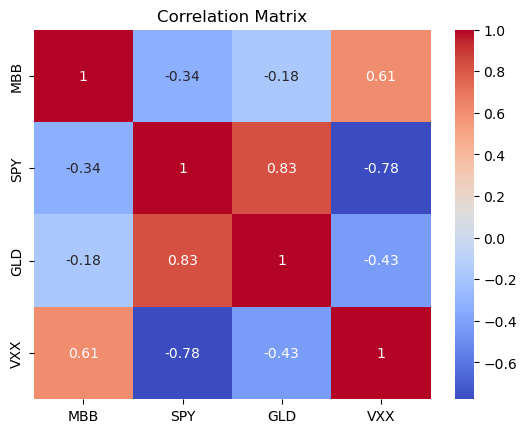

In [76]:
df = pd.DataFrame(data, columns=tickers)  # Assuming 'data' contains historical returns
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [78]:
risk_free_rates = [4.8, 4.0, 3.5]
derivatives_weights = [0.247, 0.137, 0.0204]

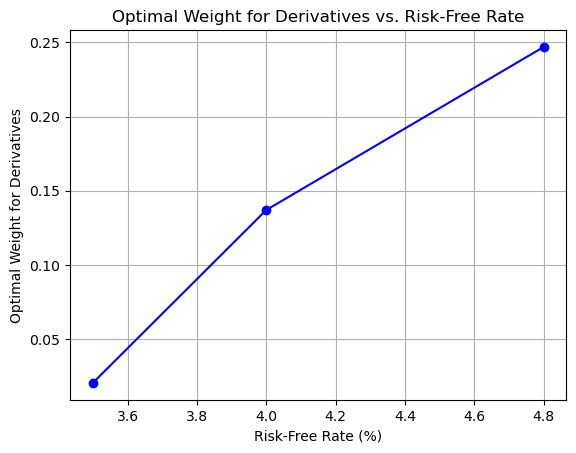

In [80]:
plt.plot(risk_free_rates, derivatives_weights, marker='o', linestyle ='-', color ='b')
plt.title('Optimal Weight for Derivatives vs. Risk-Free Rate')
plt.xlabel('Risk-Free Rate (%)')
plt.ylabel('Optimal Weight for Derivatives')
plt.grid(True)
plt.show()

In [82]:

# Simulate returns for 4 assets (Gold, SP500, Derivatives, MBS) over 12 months
n_assets = 4
n_periods = 48
np.random.seed(42)

# Simulate expected returns and covariance matrix
mean_returns = np.random.uniform(0.01, 0.05, n_assets)  # Monthly returns
cov_matrix = np.random.uniform(0.0001, 0.01, (n_assets, n_assets))
cov_matrix = (cov_matrix + cov_matrix.T) / 2  # Ensure covariance matrix is symmetric

# Simulate returns for each period (assuming 12 months of data)
returns = np.random.multivariate_normal(mean_returns, cov_matrix, n_periods)

# Create a DataFrame for easier visualization
assets = ['Gold', 'MBS', 'SP500', 'Derivatives']
returns_df = pd.DataFrame(returns, columns=assets)

# Portfolio performance function
def portfolio_performance(weights, mean_returns, cov_matrix):
    port_return = np.dot(weights, mean_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return port_return, port_volatility

# Transaction costs (percentage of portfolio value)
def transaction_cost(weights_t, weights_t_1, transaction_fee=0.001):
    # Calculate absolute change in weights for each asset
    change_in_weights = np.abs(weights_t - weights_t_1)
    # Assuming each asset's price is 1 unit for simplicity, multiply by portfolio value
    return transaction_fee * np.sum(change_in_weights)

# Negative Sharpe ratio function (to minimize)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.03, transaction_fee=0.001, previous_weights=None, portfolio_value=1):
    port_return, port_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    
    # If it's the first period, there's no previous weight, so no transaction cost
    if previous_weights is not None:
        cost = transaction_cost(weights, previous_weights, transaction_fee)
    else:
        cost = 0

    # Sharpe ratio considering the transaction cost
    return -((port_return - risk_free_rate) / port_volatility) + cost / portfolio_value

# Constraints: weights sum to 1, no short-selling
def constraint(weights):
    return np.sum(weights) - 1  # Weights must sum to 1

bounds = [(0, 1) for _ in range(n_assets)]  # No short-selling: asset weights between 0 and 1

# Initialize portfolio (equally weighted to start)
initial_weights = np.ones(n_assets) / n_assets

# Risk-free rate
risk_free_rate = 0.04
transaction_fee = 0.001  # Transaction cost (e.g., 0.1%)

# Store the results
optimal_weights = []
portfolio_returns = []
portfolio_volatilities = []
transaction_costs = []

# Simulate optimization over 12 months (multi-period)
for i in range(n_periods):
    # Get current period returns and covariance matrix
    current_returns = returns_df.iloc[i].values
    current_cov_matrix = cov_matrix  # We assume covariance is constant for simplicity
    
    # Solve for optimal portfolio weights using quadratic programming
    result = minimize(negative_sharpe_ratio, initial_weights, args=(current_returns, current_cov_matrix, risk_free_rate, transaction_fee, optimal_weights[-1] if optimal_weights else None, 1),
                      method='SLSQP', bounds=bounds, constraints={'type': 'eq', 'fun': constraint})
    
    # Get optimal weights for this period
    optimal_weights_period = result.x
    optimal_weights.append(optimal_weights_period)
    
    # Calculate portfolio performance for this period
    port_return, port_volatility = portfolio_performance(optimal_weights_period, current_returns, current_cov_matrix)
    portfolio_returns.append(port_return)
    portfolio_volatilities.append(port_volatility)
    
    # Calculate transaction cost for this period
    if i > 0:
        cost = transaction_cost(optimal_weights_period, optimal_weights[i-1], transaction_fee)
    else:
        cost = 0
    transaction_costs.append(cost)

# Convert results to DataFrame for better analysis
portfolio_df = pd.DataFrame({
    'Month': range(1, n_periods + 1),
    'Optimal Weights': optimal_weights,
    'Returns': portfolio_returns,
    'Volatility': portfolio_volatilities,
    'Transaction Costs': transaction_costs
})

print(portfolio_df)


    Month                                    Optimal Weights   Returns  \
0       1                               [1.0, 0.0, 0.0, 0.0]  0.112916   
1       2  [0.4189486322517096, 0.0, 7.892991815694472e-1... -0.034796   
2       3  [2.220446049250313e-16, 0.9999999999999999, 0....  0.142983   
3       4  [5.93757903388965e-12, 0.3055351227255668, 0.6...  0.118918   
4       5  [1.3877787807814457e-16, 0.0, 3.05311331771918...  0.110165   
5       6                               [0.0, 0.0, 0.0, 1.0]  0.107901   
6       7                               [0.0, 1.0, 0.0, 0.0] -0.011882   
7       8  [0.0, 0.33567360960624604, 0.6643263904205982,...  0.146211   
8       9  [6.661338147750939e-16, 0.0, 0.0, 0.9999999999...  0.099262   
9      10                               [0.0, 0.0, 1.0, 0.0]  0.131804   
10     11  [5.109996103413983e-13, 0.09887641003721931, 0...  0.121006   
11     12  [2.942091015256665e-15, 7.216449660063518e-15,...  0.105387   
12     13             [0.0, 1.0, 0.0, 

/tmp/ipykernel_184/2476450704.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  returns = np.random.multivariate_normal(mean_returns, cov_matrix, n_periods)


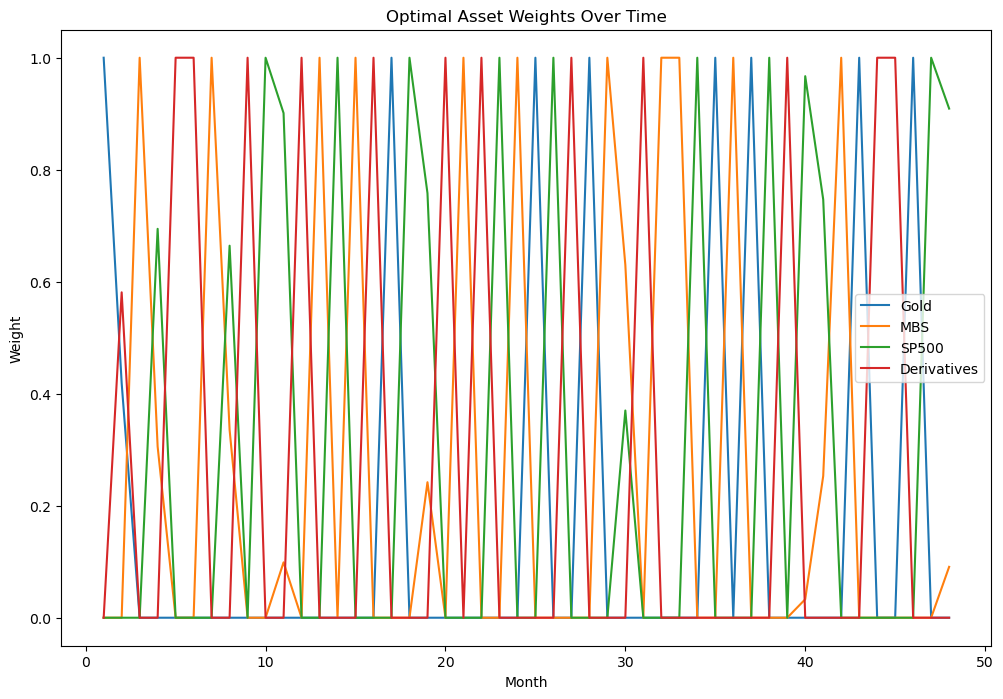

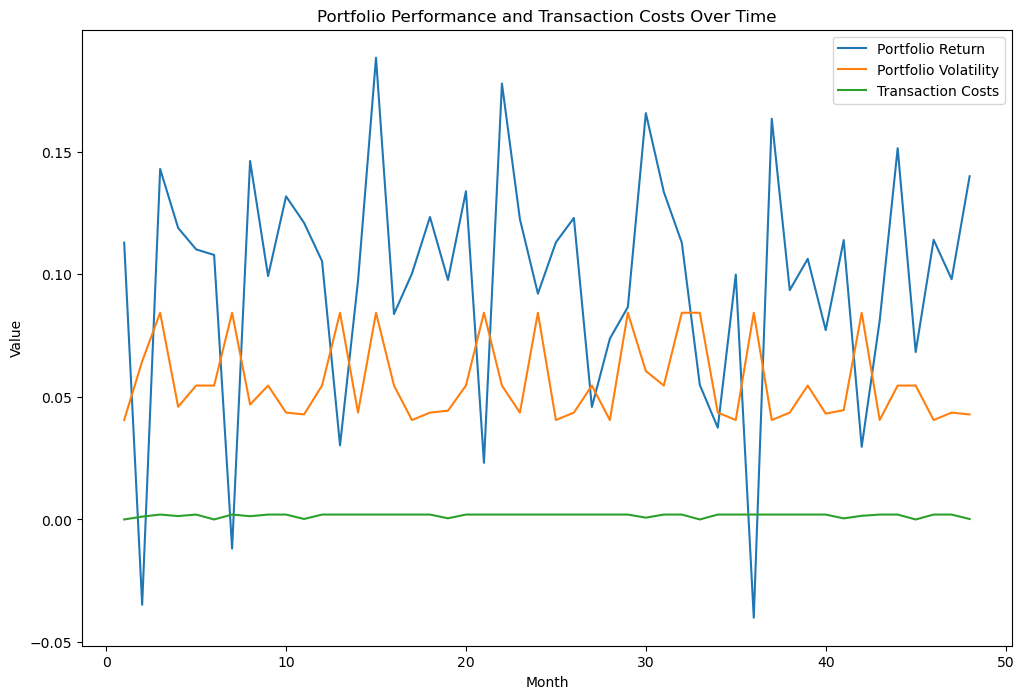

In [84]:
import matplotlib.pyplot as plt

# Plot Optimal Portfolio Weights over Time
weights_df = pd.DataFrame(optimal_weights, columns=assets)
weights_df['Month'] = range(1, n_periods + 1)

plt.figure(figsize=(12, 8))
for asset in assets:
    plt.plot(weights_df['Month'], weights_df[asset], label=asset)
plt.title('Optimal Asset Weights Over Time')
plt.xlabel('Month')
plt.ylabel('Weight')
plt.legend()
plt.show()

# Plot Portfolio Return, Volatility, and Transaction Costs over Time
plt.figure(figsize=(12, 8))
plt.plot(range(1, n_periods + 1), portfolio_returns, label='Portfolio Return')
plt.plot(range(1, n_periods + 1), portfolio_volatilities, label='Portfolio Volatility')
plt.plot(range(1, n_periods + 1), transaction_costs, label='Transaction Costs')
plt.title('Portfolio Performance and Transaction Costs Over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()
